# Exercise 1: introduction and integrate and fire neurons 

In [ ]:
#!pip install brian2
#!pip install neurodynex3

In [ ]:
%matplotlib inline 
import brian2 as b2 # the neural network simulator
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

### Question 1: 
see: [Exercise 2.1](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html) 
what is the minimum current that will activate a neuron? Insert it into a simulation and verify that you get no spikes. Describe what you see.

We have $I(t) = \frac{u(t) - u_{rest}}{R} + C \frac{du}{dt} $

If the neuron does not spike, the second term will go to zero. Thus,

$I(t) = \frac{u(t) - u_{rest}}{R} $, where all unknowns are known:
$ R = 10*10^6  \Omega $

$ u(t) = -50*10^{-3} V $

$ u_{rest} = - 70*10^{-3} V$

THerefore we get $I(t) = 2*10^{-9} A$ as the minimum currect for activtating a current

nr of spikes: 0


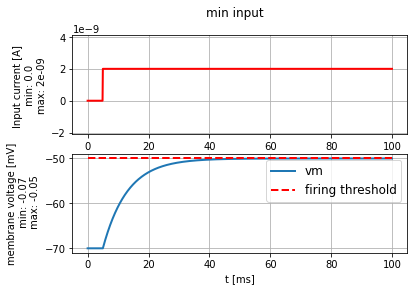

nr of spikes: 1


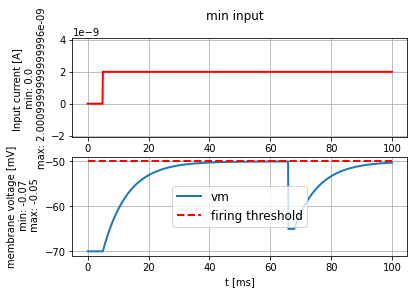

In [ ]:
Ivals = [2*10**-3,2.001*10**-3]

for i in Ivals:
  step_current = input_factory.get_step_current(
      t_start=5, t_end=100, unit_time=b2.ms,
      amplitude=i*b2.uamp)  

  (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

  plot_tools.plot_voltage_and_current_traces(
  state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
  print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0
  plt.show()

### Question 2
see [Exercise 2.2](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html#exercise-f-i-curve) 
Compute a f/I (current to firing rate curve) by injecting current steps (run simulation by re-using code from section 2.1.2) 

nr of spikes: 498


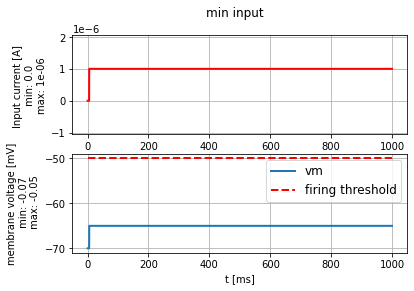

In [ ]:
Iinput = 1
simtime = 1000

step_current = input_factory.get_step_current(
    t_start=5, t_end=simtime, unit_time=b2.ms,
    amplitude=Iinput*b2.uamp)  

(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = simtime * b2.ms)

plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0
plt.show()

We see that for a current of 1*10^-6 the nr. of spikes parameter maxes out at 498 spikes (per second) , and the plot of the membrane voltage basically crashes. For higher currents, the plot and the nr of spikes stays the same; therefore the maximum rate is expected to be 332 spikes per second

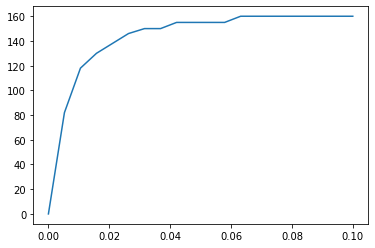

In [ ]:
spikecounter = []
simtime = 500 # milliseconds
Iinput = np.linspace(0,0.1,20) # where the upper bound 0.1 equals 100nA

for i in Iinput:
  step_current = input_factory.get_step_current(
      t_start=5, t_end=simtime, unit_time=b2.ms,
      amplitude=i*b2.uamp)

  (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = simtime * b2.ms, abs_refractory_period = 3*b2.ms)

  #plot_tools.plot_voltage_and_current_traces(
  #state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
  spikecounter.append(spike_monitor.count[0])
  
plt.plot(Iinput,spikecounter)
plt.show()

## Question 3 Experimentally estimate the parameters of a LIF neuron
see [Exercise 2.3](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html#exercise-experimentally-estimate-the-parameters-of-a-lif-neuron)



In [ ]:
i = 10 * b2.nA

In [ ]:
def simulate_random_neuron(input_current, obfuscated_param_set, sim_time=50 * b2.ms):
    """
    Simulates a LIF neuron with unknown parameters (obfuscated_param_set)
    Args:
        input_current (TimedArray): The current to probe the neuron
        obfuscated_param_set (list): obfuscated parameters

    Returns:
        StateMonitor: Brian2 StateMonitor for the membrane voltage "v"
        SpikeMonitor: Biran2 SpikeMonitor
    """
    vals = LIF._deobfuscate_params(obfuscated_param_set)
    # run the LIF model
    state_monitor, spike_monitor = LIF.simulate_LIF_neuron(
        input_current,
        simulation_time=sim_time,
        v_rest=vals[0],
        v_reset=vals[1],
        firing_threshold=vals[2],
        membrane_resistance=vals[3],
        membrane_time_scale=vals[4],
        abs_refractory_period=vals[5])
    return state_monitor, spike_monitor

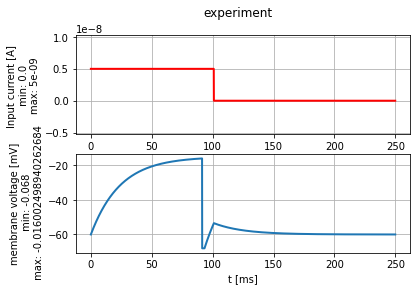

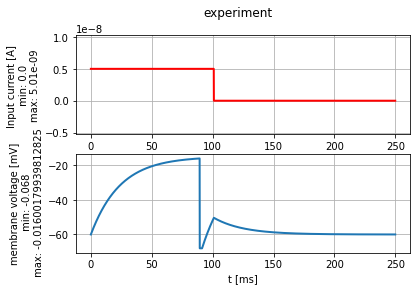

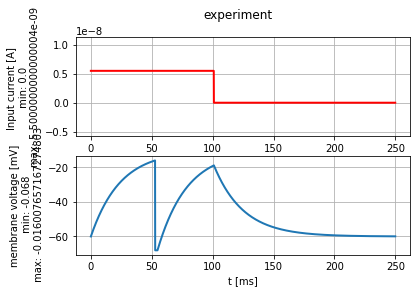

In [ ]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

Ivals = [5,5.01,5.5]

for i in Ivals:
  # define your test current
  test_current = input_factory.get_step_current(
      t_start=0, t_end=100, unit_time=b2.ms, amplitude= i * b2.namp)

  # probe the neuron. pass the test current AND the random params to the function
  state_monitor, spike_monitor = simulate_random_neuron(test_current, random_parameters, sim_time=250 * b2.ms)

  # plot
  plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")
  plt.show()

## Visual inspection
From visual inspection we can see that the resting potential is -60mV; the firing threshold is ~-15mV; the resting potential is ~-70mV; the refractory period is ~3ms:

$ u_{rest} = - 60 * 10^{-3} V$

$ u_{fire} = - 15 * 10^{-3} V$

$ u_{reset} = - 70 * 10^{-3} V$

$ t_{refrac} = - 3 * 10^{-3} s$

## Membrane resistance
Now we still have to find the membrane resistance and the membrane time scale:

The membrane resistance we can find through the same equation as in Question 1; from changing the current we see that the minimum current is $ I = 5 * 10^{-9} A $

Solving using $I(t) = \frac{u(t) - u_{rest}}{R} $, we can find the membrane resistance:

$ R = 11*10^6 \Omega$

## Membrane time-scale

Next we also want to find the membrane time-scale,

We us the following equation,
$ u(t) = u_{rest} + R* I_0 [1 - exp^{-\frac{t}{\tau_m}}]$

for which we know $R$, $I_0$, $u_{rest}$; moreover, we can set $u_t$ at $t$ to be the values of a spike

From the code cells below we find that the experimental value of the time-scale of the membrane is $\tau = 30.9 ms$

In [ ]:
data = spike_monitor.get_states(['t', 'i'], units=False)
print('the spike time for I = 5.5namp is {:.5f}s'.format(data['t'][0]))

the spike time for I = 5.5namp is 0.05270s


In [ ]:
t = data['t'][0]
ufire = -15*(10**-3)
urest = -60*(10**-3)
R = 11*(10**6)
current = 5*(10**-9)
tau = t/(-np.log(1-(ufire-urest)/(R*current)))
print('the membrane time-scale is tau = {:.2f} ms'.format(tau*1000))

the membrane time-scale is tau = 30.91 ms


In [ ]:
LIF._deobfuscate_params(random_parameters)

[-60. * mvolt,
 -68. * mvolt,
 -16. * mvolt,
 9. * Mohm,
 24. * msecond,
 2. * msecond]

## Final answer

We found the experimental values, and we can compare them to the empirical data:

                Experimental VS Empirical

$ u_{rest} = - 60 * 10^{-3} V$ VS $- 60 * 10^{-3} V$

$ u_{fire} = - 15 * 10^{-3} V$ VS $- 16 * 10^{-3} V$

$ u_{reset} = - 70 * 10^{-3} V$ VS $- 68 * 10^{-3} V$

$ t_{refrac} = - 3 * 10^{-3} s$ VS $- 2 * 10^{-3} s$

$ R = 11*10^6 \Omega$ VS $9*10^6 \Omega$

$\tau_m = 30.9 ms$ VS $24 ms$

